## Reference
https://pydocument.hatenablog.com/entry/2023/04/03/230137

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [7]:
url = 'https://query1.finance.yahoo.com/v7/finance/download/GOOG?period1=1583020800&period2=1614556800&interval=1d&events=history&includeAdjustedClose=true'
df = pd.read_csv(url)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-02,67.580498,69.543503,66.340752,69.455498,69.455498,48630000
1,2020-03-03,69.971001,70.507500,66.599998,67.069504,67.069504,48046000
2,2020-03-04,67.961502,69.404503,67.155502,69.325996,69.325996,38266000
3,2020-03-05,67.510002,67.945503,65.254997,65.952003,65.952003,51226000
4,2020-03-06,63.853001,65.310997,63.052502,64.920502,64.920502,53212000


In [8]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-02,67.580498,69.543503,66.340752,69.455498,69.455498,48630000
1,2020-03-03,69.971001,70.507500,66.599998,67.069504,67.069504,48046000
2,2020-03-04,67.961502,69.404503,67.155502,69.325996,69.325996,38266000
3,2020-03-05,67.510002,67.945503,65.254997,65.952003,65.952003,51226000
4,2020-03-06,63.853001,65.310997,63.052502,64.920502,64.920502,53212000


In [9]:
df.set_index('Date', inplace=True)
#df.set_index('Date')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-02,67.580498,69.543503,66.340752,69.455498,69.455498,48630000
2020-03-03,69.971001,70.507500,66.599998,67.069504,67.069504,48046000
2020-03-04,67.961502,69.404503,67.155502,69.325996,69.325996,38266000
2020-03-05,67.510002,67.945503,65.254997,65.952003,65.952003,51226000
2020-03-06,63.853001,65.310997,63.052502,64.920502,64.920502,53212000


In [10]:
sma = df['Close'].rolling(window=20).mean()

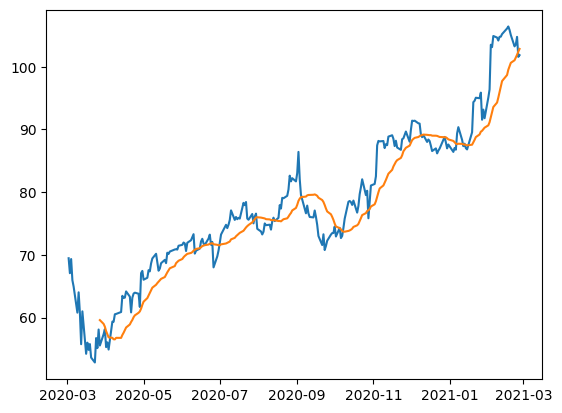

In [11]:
plt.plot(df['Close'])
plt.plot(sma)
plt.show()

In [61]:
p = d = q = range(0, 2)
pdq = [(x, y, z) for x in p for y in d for z in q]
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [62]:
for param in pdq:
    try:
        model = sm.tsa.ARIMA(df['Close'], order=param)
        results = model.fit()
        print('ARIMA{} - AIC:{}'.format(param, results.aic))
    except:
        continue

/home/bitwalk/MyProjects/stock-explorer/venv/lib64/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/bitwalk/MyProjects/stock-explorer/venv/lib64/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/bitwalk/MyProjects/stock-explorer/venv/lib64/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/bitwalk/MyProjects/stock-explorer/venv/lib64/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index 

ARIMA(0, 0, 0) - AIC:1972.8915029760542
ARIMA(0, 0, 1) - AIC:1683.9432688595095
ARIMA(0, 1, 0) - AIC:989.5998899166332
ARIMA(0, 1, 1) - AIC:983.1801917745499
ARIMA(1, 0, 0) - AIC:1001.0015833367991
ARIMA(1, 0, 1) - AIC:994.954246441128
ARIMA(1, 1, 0) - AIC:981.0128984117939
ARIMA(1, 1, 1) - AIC:980.7004134482139


/home/bitwalk/MyProjects/stock-explorer/venv/lib64/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/bitwalk/MyProjects/stock-explorer/venv/lib64/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/bitwalk/MyProjects/stock-explorer/venv/lib64/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [63]:
model = sm.tsa.ARIMA(df['Close'], order=(1, 1, 0))
results = model.fit()

/home/bitwalk/MyProjects/stock-explorer/venv/lib64/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/bitwalk/MyProjects/stock-explorer/venv/lib64/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/bitwalk/MyProjects/stock-explorer/venv/lib64/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [64]:
pred = results.predict(start='2021-02-01', end='2021-03-01', dynamic=True)
plt.plot(df['Close'])
plt.plot(pred)
plt.show()

KeyError: 'The `end` argument could not be matched to a location related to the index of the data.'